<a href="https://colab.research.google.com/github/Darwinsito/Proyecto02/blob/main/proyecto02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto N°2.
# Desarrollo Python.
# Alumno: Darwin Garrido Chávez.
# Instructora: Ingeniera Yaneth Ccahuantico Mendoza.


# Ejercicio N° 1

Fichero autos.csv 

Generar una función y utilizar esta para recodificar la variable “país de origen” (1, 2, 3) en el dataframe a través de la función apply. 


In [ ]:
import pandas as pd #Importamos libreria pandas como pd
datos = pd.read_csv('/content/autos - autos.csv', sep=';') #Definimos una función para recodificar el pais de origen

def cambia(x:str): # Se define una función para modificar
  '''
  Devuelve 1 si x= "Bolivia"
           2 si x= "Brasil"
           3 si es "Argentina"
  Parámetros   
  ----------
  x : str

  '''
  if x=="Bolivia": return 1 # Si la variable es USA retorna 1
  if x=="Brasil": return 2 # Si la variable Europa la función retorna 2
  return 3 # Si la variable es Japan la función 3
# Aqui termina la función cambia

datos['Pais_Origen']=datos['Pais_Origen'].apply(cambia) #Utilizamos el método apply para codificar la variable
datos.head() #Mostramos las 5 primeras filas de datos
 

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,3,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,3,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,3,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,3,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,3,3449,302.0,10.5,ford torino,1/01/1970,140.0


#Ejercicio N°2

Generar un Notebook Colab con código y resultados, que contiene información de autos de un periodo de tiempo. Resolver los siguientes: 
- Limpieza y tratamiento de las variables (Según corresponda) - Generar 5 nuevas variables aplicando los siguientes criterios con las variables numéricas: 
1. Log10(var1/var2) 
2. Sqrt(var1)*exp(var2)/200
 
3. Si var 1 > var 2 → 5, caso contrario 3 
4. 1/logn(var1/var2)*100 
5. var2**2/var1


In [ ]:
import numpy as np # Se importa la  libreria numpy como np
from numpy import log10,sqrt,exp, log # Importamos algunas funciones matemáticas de numpy
import pandas as pd # Importamos pandas como pd


datos = pd.read_csv('/content/autos - autos.csv',sep=';') #Creamos un dataframe con el archivo autos.csv
datos.info() # Revisamos el dataframe para comprobar si tiene datos perdidos

#Limpieza de datos numéricos perdidos. Se imputan con la mediana
datos.fillna(datos.median(), inplace=True) #imputación paramétrica
datos.info()

#Para crear las 5 nuevas variables utilizamos las variables Millas_por_galon y cilindros
78
datos['v1']=(datos["Millas_Por_Galon"]/datos["Cilindros"]).apply(log10) # Creamos la columna v1
datos['v2']=(datos["Millas_Por_Galon"].apply(sqrt))*datos["Cilindros"].apply(exp)/200 # Se crea la columna v2
datos['v3']=np.where(datos["Millas_Por_Galon"]>=datos["Cilindros"], 5,3) # Creamos la columna v3
datos['v4']=1/((datos["Millas_Por_Galon"]/datos["Cilindros"]).apply(log))*100 # Se crea la colmuna v4
datos['v5']=datos["Cilindros"]**2/datos["Millas_Por_Galon"] #Se crea la columna v5

datos.tail() #Se muestra las 5 últimas filas del DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   406 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,v1,v2,v3,v4,v5
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,0.829304,1.418502,5,52.368565,0.592593
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.041393,1.810816,5,41.703239,0.363636
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,0.903090,1.544269,5,48.089835,0.500000
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,0.845098,1.444531,5,51.389834,0.571429
405,31.0,4,USA,2720,119.0,19.4,chevy s-10,1/01/1982,82.0,0.889302,1.519948,5,48.835449,0.516129


# Ejercicio N°3

- Crear una función que permita generar 3 variables cualitativas ordinales a partir de las variables numéricas con los siguientes criterios: ★ Si es mayor a la “media + 1*desviación estándar” → Alto ★ Si está entre “media - 1*desviación estándar” y “media + 1*desviación estándar” → Medio 
★ Si es menor a la “media - 1*desviación estándar” → Bajo Nota: Mostrar con las nuevas variables generadas. 
Elegir con libertad las variables a trabajar. 
La función debe contar con su respectiva documentación


In [ ]:
import pandas as pd
datos = pd.read_csv('/content/autos - autos.csv',sep=';') # Importamos el archivo con extension csv.

def cambia(columna: str): #Definimos una función cambia que recibe el nombre de una variable numérica 
  '''
  Devuelve un valor de "Alto", "Medio" o "Bajo" dependiendo del valor recibido.
  El valor de comparación es la media + una desviación estándar o la media - una desviación estándar

  Parámetro/
  ----------
  x : str(Nombre de una variable numérica de datos)
  '''
  media = datos[columna].mean()  #Se calcula la media de la variable numérica y se guarda en la variable
  des = datos[columna].std()#Se calcula la desviación estándar de la variable numérica  se guarda
  x = np.where(datos[columna] > media + des, "Alto", #Si el dato es mayor que la suma entre media y desviación
              np.where(datos[columna] < media - des, "Bajo", # Si el dato es menor que la diferencia entre 
                                         "Medio"))#En caso contrario x = "medio"
  return x #Se retorna el valor de la nueva variable

datos["nueva1"] = cambia("Caballo_De_Fuerza") #Definimos la columna nueva1
datos["nueva2"] = cambia("Aceleracion") #Definimos la columna nueva2
datos["nueva3"] = cambia("Millas_Por_Galon") #Definimos la columna nueva3

datos.head() #Se muestran las 5 primeras filas dle DataFrame

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,nueva1,nueva2,nueva3
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,Medio,Bajo,Medio
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,Alto,Bajo,Bajo
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,Alto,Bajo,Medio
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,Alto,Bajo,Medio
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,Medio,Bajo,Medio


# Ejercicio N°4

- Crear una función que muestre los siguientes gráficos (simultáneamente) para las variables numéricas, según una variable cualitativa: 
❖ Cajas y bigotes 
❖ Barras de la media 
❖ Histograma con densidad (Curva) 
La función debe contar con su respectiva documentación


TypeError: ignored

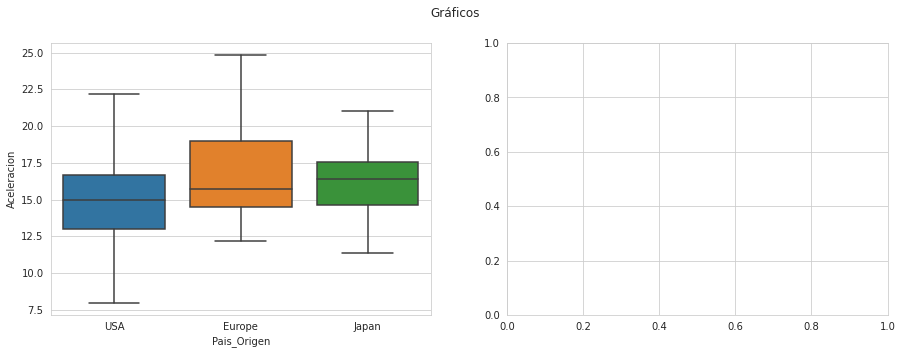

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
def graficos(datos):
  '''
    muestra los siguientes gráficos (simultaneamente)para las variables numéricas,
    según una variable cualitativa:
    ❖Cajas 
    ❖Barras 
    ❖Histograma con Curva

  Parámetros
  ----------
  datos : DataFrame
  '''
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle("Gráficos")
sns.boxplot(x="Pais_Origen", y="Aceleracion", data=datos, ax=axes[0])
tabla=pd.crosstab(df['Pais_Origen'], df['Cilindros'],
                  rowsnames = ["Pais_Origen"],
                  colnames = ["Cilindros"],
                   aggfunc = "mean",
                   valores = df['Caballo_De_Fuerza']
                  ).round(2)               
tabla.plot.bar()
sns.histplot(data=datos, x="Desplazamiento", kde=True, ax=axes[1])
# finalizamos los gráficos

# Ejercicio N°5

- Crear una función que devuelva un mapa de calor con la correlación de todas las variables numéricas (incluye las generadas), para cada país. 
● La función debe contar con su respectiva documentación. 
Proyecto N°2: Se adjunta Data: - Resolver los ejercicios 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


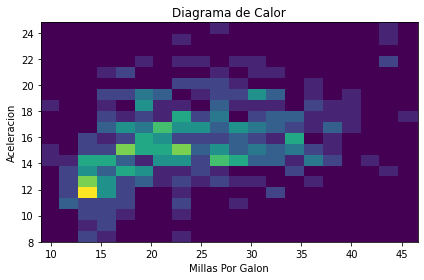

In [ ]:
import seaborn as sns # importamos la libreria seaborn como sns
import pandas as pd # importamos la libreria pandas como pd
import matplotlib.pyplot as plt 
df = pd.read_csv('/content/autos - autos.csv', sep=';')
df.fillna(df.median(), inplace=True)
def calor(datos):
  '''
    Mostramos un gráfico de calor para dos variables del DataFrame datos

  Parámetros
  ----------
  datos : dataframe
  '''
  fig, ax = plt.subplots(tight_layout = True)
  plt.hist2d(datos['Millas_Por_Galon'], datos['Aceleracion'], bins=20)
  plt.title('Diagrama de Calor')
  plt.xlabel('Millas Por Galon')
  plt.ylabel('Aceleracion')
  plt.show()

  #Finalizamos la función de los gráficos

calor(df)
